In [5]:
# Creates Initial connection to data base
import sqlite3
import pandas as pd

# Connect to an existing database or create a new one
conn = sqlite3.connect('/Users/Marcy_Student/Desktop/Mod3_Kevin/data/themepark.db')
cursor = conn.cursor()

In [26]:
# write query for first figure
query = '''
WITH daily_performance AS (
  SELECT 
    d.day_name, 
    SUBSTR(d.day_name,1,3) AS initals, -- Added just to use in charts
    COUNT(v.visit_id) AS daily_visits,
    ROUND(SUM(v.spend_dollars),2) AS daily_spent
  FROM fact_visits v
  INNER JOIN dim_date d ON v.date_id = d.date_id
  WHERE spend_dollars IS NOT NULL
  GROUP BY d.day_name
)
SELECT 
  *
FROM daily_performance
ORDER BY daily_spent DESC, daily_visits DESC
'''

daily_perf = pd.read_sql_query(query, conn)
daily_perf.head(10)

,day_name,initals,daily_visits,daily_spent
0,Sunday,Sun,6,1128.43
1,Monday,Mon,8,910.93
2,Saturday,Sat,6,900.91
3,Friday,Fri,6,555.41
4,Wednesday,Wed,5,507.12
5,Thursday,Thu,4,422.10
6,Tuesday,Tue,2,223.26


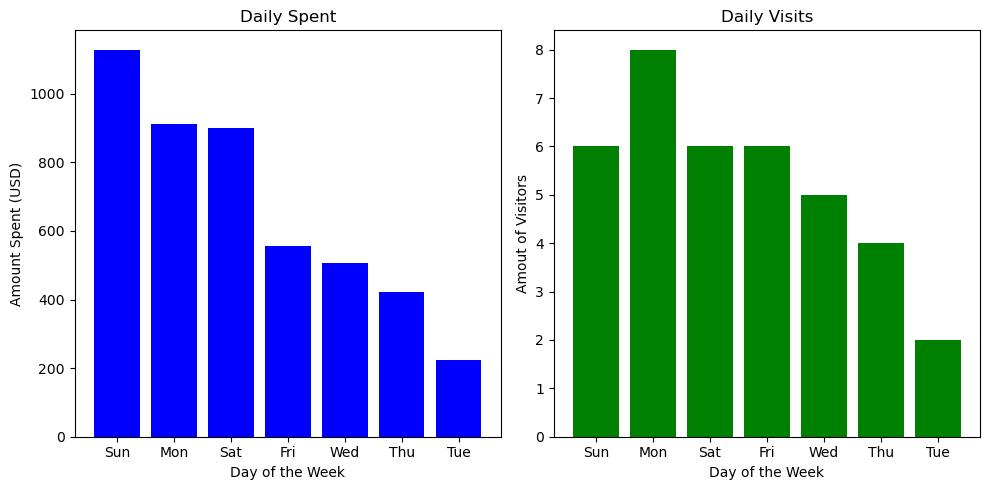

In [34]:
import matplotlib.pyplot as plt
import numpy as np

cats = daily_perf['initals']
val1 = daily_perf['daily_spent']
val2 = daily_perf['daily_visits']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# First dataset
axes[0].bar(cats, val1, color='blue')
axes[0].set_title("Daily Spent")
axes[0].set_xlabel("Day of the Week")
axes[0].set_ylabel("Amount Spent (USD)")

# Second dataset
axes[1].bar(cats, val2, color='green')
axes[1].set_title("Daily Visits")
axes[1].set_xlabel("Day of the Week")
axes[1].set_ylabel("Amout of Visitors")

plt.tight_layout()
plt.savefig("/Users/Marcy_Student/Desktop/Mod3_Kevin/figures/daily_attendance.png",bbox_inches="tight")

